In [1]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
from IPython.display import YouTubeVideo
from IPython.display import Audio


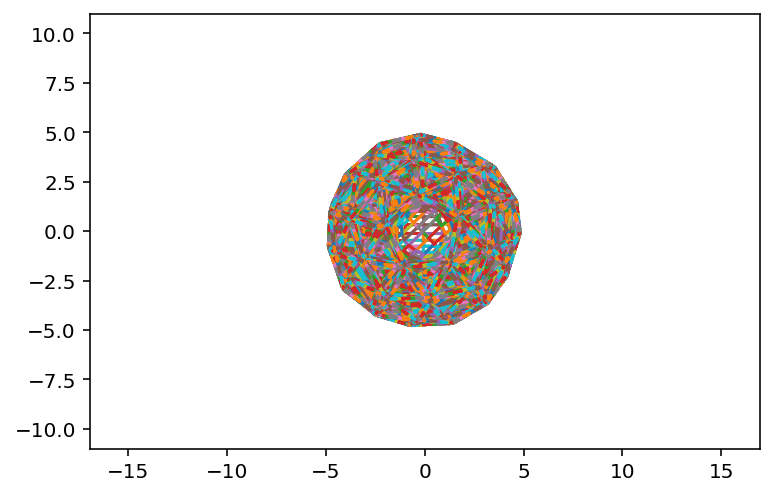

In [2]:
#import matplotlib.animation
import matplotlib.animation as animation
mp.rcParams['animation.html'] = 'jshtml'
#
#to get additional args to animate:
#def animate(angle, *fargs):
#    fargs[0].view_init(azim=angle)

def obj(fp):
    """
    reads a standard .obj file as used in solid modeling.
    returns a list of 2-d numpy arrays, in which columns are vertices of a face.
    """
    vertices = []
    faces = []
    for line in fp:
        tokens = line.split()
        # vertex lines
        if ((len(tokens) > 0) and (tokens[0] == 'v')):
            vertices.append([float(tokens[1]), float(tokens[2]), float(tokens[3])])
        # face lines
        elif ((len(tokens) > 0) and (tokens[0] == 'f')):
            # note that .obj arrays index from 1
            # each face is a set of indices into the vertex array,
            # with optional additional properties following slashes
            face = [int(t.split('/')[0])-1 for t in tokens[1:]] + [int(tokens[1].split('/')[0])-1]
            faces.append(face)
    coords = [np.array([vertices[i] for i in f]).T for f in faces]
    return coords

fig = plt.figure()
ax = plt.axes(xlim=(-5,5),ylim=(-5,5))
plt.plot(-10,-10,'')
plt.plot(10,10,'')
plt.axis('equal')

with open('20257_Snub_Dodecahedron_v1.obj','r') as fp:
    ball=obj(fp)

ballLines = []
for b in ball:
    ballLines += ax.plot([],[])
    
    
def animate(frame):
    angle = 2.0 * np.pi * (frame/100.0)
    rotationMatrix = np.array([[1, 0,0],
                               [0,np.cos(angle),np.sin(angle)],
                               [np.sin(angle), 0, np.cos(angle)]])
    for b,l in zip(ball,ballLines):
        rb = rotationMatrix @ b
        l.set_data(rb[0],rb[1])
    fig.canvas.draw()
#
# create the animation 
animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [9]:
# Writer = animation.writers['ffmpeg']
writer=plt.rcParams['animation.ffmpeg_path'] ='r\elizabethysong\opt\miniconda3\ffmpeg.exe'

# writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani=animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)
ani.save('linearballrolling.mp4', writer=writer)



MovieWriter r\elizabethysong\opt\miniconda3fmpeg.exe unavailable; using Pillow instead.
/Users/elizabethsong/opt/miniconda3/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


ValueError: unknown file extension: .mp4

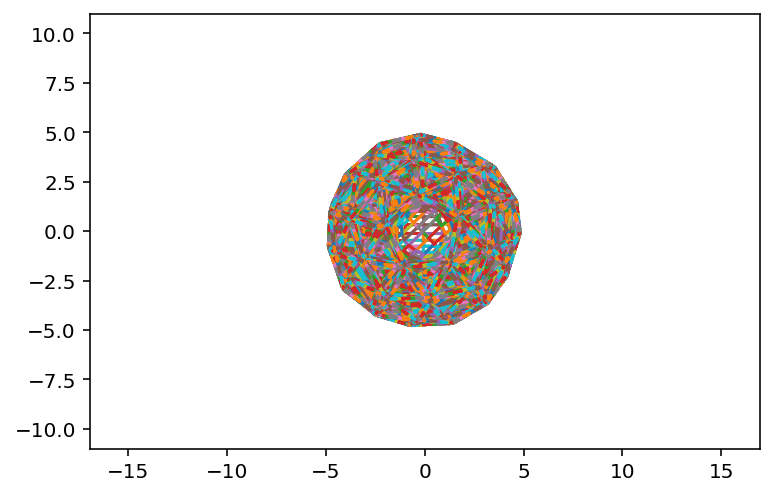

In [29]:
def obj(fp):
    """
    reads a standard .obj file as used in solid modeling.
    returns a list of 2-d numpy arrays, in which columns are vertices of a face.
    """
    vertices = []
    faces = []
    for line in fp:
        tokens = line.split()
        # vertex lines
        if ((len(tokens) > 0) and (tokens[0] == 'v')):
            vertices.append([float(tokens[1]), float(tokens[2]), float(tokens[3])])
        # face lines
        elif ((len(tokens) > 0) and (tokens[0] == 'f')):
            # note that .obj arrays index from 1
            # each face is a set of indices into the vertex array,
            # with optional additional properties following slashes
            face = [int(t.split('/')[0])-1 for t in tokens[1:]] + [int(tokens[1].split('/')[0])-1]
            faces.append(face)
    coords = [np.array([vertices[i] for i in f]).T for f in faces]
    return coords

fig = plt.figure()
ax = plt.axes(xlim=(-5,5),ylim=(-5,5))
plt.plot(-10,-10,'')
plt.plot(10,10,'')
plt.axis('equal')

with open('20257_Snub_Dodecahedron_v1.obj','r') as fp:
    ball=obj(fp)

ballLines = []

for b in ball:
    ballLines += ax.plot([],[])

    
def animate(frame):
    angle = 2.0 * np.pi * (frame/100.0)
    rotationMatrix = np.array([[1, 0, 0],
                               [0, np.cos(angle), np.sin(angle)],
                               [np.sin(angle), 0, np.cos(angle)]])
    for b,l in zip(ball,ballLines):
        rb = rotationMatrix @ b
        l.set_data(rb[0],rb[1])

    fig.canvas.draw()
#
# create the animation 
animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)


In [32]:
animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)


In [31]:
%matplotlib notebook

In [14]:
def animate(frame):
    angle = 2.0 * np.pi * (frame/100.0)
    rotationMatrix = np.array([[1,             0,              0],
                               [0,             1,              0],
                               [np.sin(angle), 0, np.cos(angle)]])
    rotationMatrix1 = np.array([[np.cos(angle), 0, -np.sin(angle)],
                               [0,             1,              0],
                               [np.sin(angle), 0, np.cos(angle)]])
    for b,l in zip(ball,ballLines):
        rb = rotationMatrix @ b
        l.set_data(rb[0],rb[1])
        
    for c,cl in zip(cube,cubeLines):
        cb = rotationMatrix1 @ c
        cl.set_data(cb[0],cb[1])
        
    fig.canvas.draw()

animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)



In [7]:
######CODE STARTS HERE:

#defining function "obj" - returns a list of 2d arrays whose columns are vertices of a face of the .obj file uploaded
def obj(fp):
    vertices = []
    faces = []
    for line in fp:
        tokens = line.split()
        # vertex lines
        if ((len(tokens) > 0) and (tokens[0] == 'v')):
            vertices.append([float(tokens[1]), float(tokens[2]), float(tokens[3])])
        # face lines
        elif ((len(tokens) > 0) and (tokens[0] == 'f')):
            # note that .obj arrays index from 1
            # each face is a set of indices into the vertex array,
            # with optional additional properties following slashes
            face = [int(t.split('/')[0])-1 for t in tokens[1:]] + [int(tokens[1].split('/')[0])-1]
            faces.append(face)
    coords = [np.array([vertices[i] for i in f]).T for f in faces]
    return coords

#setting up the coordinates to the plane and the graph display
fig = plt.figure()
ax = plt.axes(xlim=(-5,5),ylim=(-5,5))
plt.plot(-10,-10,'')
plt.plot(10,10,'')
plt.axis('equal')

#loading obj file, in this case, it is a dodecahedron 3d object file
with open('20257_Snub_Dodecahedron_v1.obj','r') as fp:
  #use function obj on the open file
    ball=obj(fp)

#create empty array
ballLines = []
#for every value in "ball", ballLines
for b in ball:
    ballLines += ax.plot([],[])
    
#defining function animate -- THIS IS THE PART INVOLVING LINEAR ALGEBRA
def animate(frame):
    #this sets the frame rate
    angle = 2.0 * np.pi * (frame/100.0)
    #this is the rotation matrix, which the loaded obj depends on for instructions during the animation.
    rotationMatrix = np.array([[np.cos(angle), 0, -np.sin(angle)],
                               [1,             0,              0],
                               [np.sin(angle), 0, np.cos(angle)]])
    #this applies the rotationMatrix values to the actual "ball", creating the animation
    for b,l in zip(ball,ballLines):
        rb = rotationMatrix @ b
        l.set_data(rb[0],rb[1])
    #draws the resulting animation
    fig.canvas.draw()
#
# create the animation, this helps build the animation display
animation.FuncAnimation(fig, animate,
                       frames=np.arange(0,100,1),
                       fargs=None,
                       interval=100,
                       repeat=False)

NameError: name 'plt' is not defined